# **Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a datasets such as the bank marketing datasets from the UCI Machine Learning Repository.**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
df = pd.read_csv('/content/titanic_dataset.csv')
# The dataset provided in the link was not properly structured so I will be using the titanic dataset.

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
df.shape

(891, 7)

In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [21]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [24]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin',"Embarked"], axis=1, inplace=True)

In [25]:
#Since male and female are two cateagories we can take them as "0" or "1".
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [26]:
# by adding new values according to the corressponding data in the Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [27]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


<Axes: >

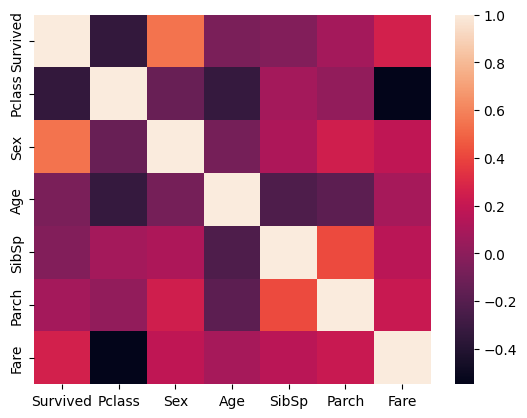

In [28]:
sns.heatmap(df.corr())

In [30]:
#check for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [32]:
from re import X
#All good now
#We will be selecting "Survive" as our target variable.
x = df.drop('Survived', axis=1)
y = df['Survived']

In [33]:
# Splitting the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=101)

In [34]:
print("Decision Tree classifier")

dtre=DecisionTreeClassifier()

dtre.fit(x_train,y_train)


Decision Tree classifier


DecisionTreeClassifier()

In [35]:
#Now making predictions using the model
y_pred_dtre= dtre.predict(x_test)
print(y_pred_dtre)

[0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0]


In [36]:
#Now to calculate the accuracy
print("Decision Tree classifier")
print("--"*30)

dtre_accuracy=round(accuracy_score(y_test,y_pred_dtre)*100,2)

print("Accuracy = ",dtre_accuracy,"%")

Decision Tree classifier
------------------------------------------------------------
Accuracy =  76.54 %


Model  :  Decision Tree Classifier

Dataset  :  Titanic Dataset

Target Variable  :  Survive

Type  :  Classification

Accuracy  :  76.5%

<------------------------------------->